In [2]:
import sys
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from PIL import Image

from skimage import io
from skimage import color
from skimage import exposure
from skimage.io import imread, imshow
from skimage.color import rgb2gray

from skimage.filters import threshold_mean, threshold_otsu
import pandas as pd

<class 'numpy.ndarray'>


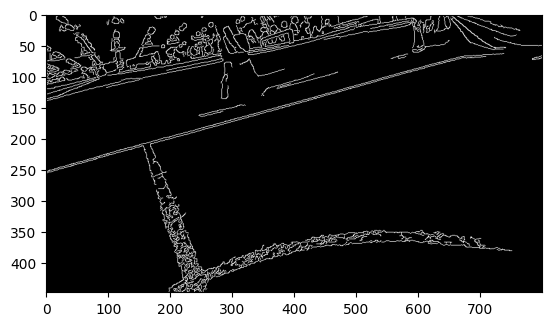

In [58]:
image_test = '269-rgb.png'
# Loads an image

src = cv.imread(image_test, cv.IMREAD_GRAYSCALE)

dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
masque_intermediaire = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

print(type(masque_intermediaire))

im = Image.fromarray(masque_intermediaire)
im.save("masque_intermediaire.png")

image_test = io.imread('269-rgb.png')


plt.imshow(masque_intermediaire)

plt.show()

235920


<function matplotlib.pyplot.show(close=None, block=None)>

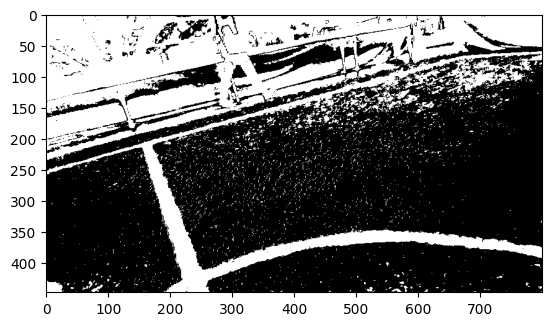

In [61]:
R = image_test[:,:,0] 
G = image_test[:,:,1]
B = image_test[:,:,2]

condition = False
x=0
for i in range(448):
    for j in range(800):
        if ((R[i][j]>39 and R[i][j]<77 )and (G[i][j]>49 and G[i][j]<132) and (B[i][j]>25 and B[i][j]<48) ) :
            x = x + 1
            R[i][j] = 0
            G[i][j] = 0
            B[i][j] = 0
        else :
            R[i][j] = 255
            G[i][j] = 255
            B[i][j] = 255
        
print(x)
masque_terrain = np.stack((R,G,B),axis=2)
plt.imshow(masque_terrain)
plt.show

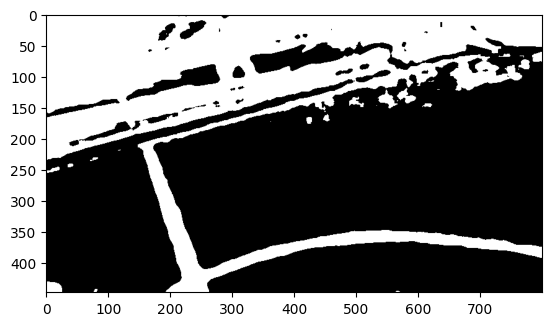

In [62]:
Opencv_Median = cv.medianBlur(masque_terrain, 11)

plt.imshow(Opencv_Median)
plt.show()

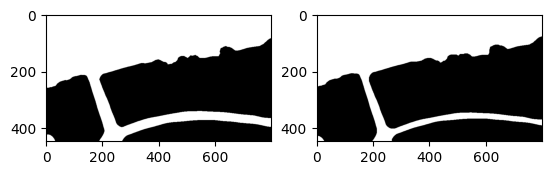

In [63]:
# Reading the input image
img = cv.imread('masque_intermediaire.png', 0)
terrain=Opencv_Median


# Taking a matrix of size 5 as the kernel
kernel = np.ones((7,7), np.uint8)
kernel1 = np.ones((3,3), np.uint8)
kernel2 = np.ones((9,9), np.uint8)
kernel3 = np.ones((11,11), np.uint8)

# The first parameter is the original image,
#kernel is the matrix with which image is convolved and third parameter is the number
# of iterations, which will determine how much you want to erode/dilate a given image.

img_dilatee = cv.dilate(terrain, kernel, iterations=1)

img_erodee = cv.erode(img_dilatee, kernel1, iterations=1)

img_dilatee_2 = cv.dilate(img_erodee, kernel2, iterations=1)

filtre_med_terrain = cv.medianBlur(img_dilatee_2, 35)

img_erodee_2 = cv.erode(filtre_med_terrain, kernel3, iterations=1)

fig, ax = plt.subplots(1,2)
ax[0].imshow(filtre_med_terrain)
ax[1].imshow(img_erodee_2)

plt.show()